In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
#解析GML文件并创建无向图
def load_graph_from_gml(gml_file):
    graph = nx.Graph()
    # 打开GML文件并读取内容
    with open(gml_file, 'r') as file:
        lines = file.readlines()

    # 查找以"edge"关键字开始的行
    edge_section = False
    for line in lines:
        line = line.strip()
        if line.startswith("edge"):
            edge_section = True
        elif line.startswith("node") and edge_section:
        # 遇到以"node"开头的行，说明GML文件中只包含边缘，没有节点，因此退出循环
            break
        elif edge_section:
            # 解析边缘的信息
            #if line.startswith("["):
             #    edge_data = {}
            if line.startswith("source"):
                source = int(line.split()[1])
            elif line.startswith("target"):
                target = int(line.split()[1])
            elif line.startswith("]"):
            # 添加边缘到图
                graph.add_edge(source, target)
    return graph

In [ ]:
# 实现节点核数计算算法
def calculate_node_cores(graph):
    if nx.number_of_selfloops(graph) > 0:
        msg = (
            "Input graph has self loops which is not permitted; "
            "Consider using G.remove_edges_from(nx.selfloop_edges(G))."
        )
        raise NetworkXError(msg)
    #创建一个字典degrees，用于存储每个节点的度数。graph.degree()返回一个字典，其中键是节点，值是该节点的度数
    degrees = dict(graph.degree())
    # 按度给节点排序.
    nodes = sorted(degrees, key=degrees.get)
    bin_boundaries = [0]
    curr_degree = 0
    for i, v in enumerate(nodes):
        #检查当前节点v的度数是否大于curr_degree，即是否进入了下一个度数的节点。
        if degrees[v] > curr_degree:
            bin_boundaries.extend([i] * (degrees[v] - curr_degree))
            curr_degree = degrees[v]
    node_pos = {v: pos for pos, v in enumerate(nodes)}
    #初始化core，它是每个节点的核数，初始值等于节点的度数。
    core = degrees
    #用于存储每个节点的邻居节点。通过nx.all_neighbors(graph, v)获取每个节点v的邻居节点列表
    nbrs = {v: list(nx.all_neighbors(graph, v)) for v in graph}
    for v in nodes:
        for u in nbrs[v]:
            #如果邻居节点`u`的核数大于节点`v`的核数
            if core[u] > core[v]:
                nbrs[u].remove(v)
                pos = node_pos[u]
                #将节点`u`的位置更新为核数为`core[u]`的节点的起始位置。
                bin_start = bin_boundaries[core[u]]
                #交换`nodes`列表中的节点位置，将节点`u`与核数为`core[u]`的节点位置进行交换
                node_pos[u] = bin_start
                node_pos[nodes[bin_start]] = pos
                nodes[bin_start], nodes[pos] = nodes[pos], nodes[bin_start]
                bin_boundaries[core[u]] += 1
                core[u] -= 1
    return core

In [ ]:
# 绘制带节点核数的无向图
def draw_graph_with_cores(graph, cores):
    pos = nx.spring_layout(graph)
    plt.figure(figsize=(10, 10))
    nx.draw(graph, pos, with_labels=True, node_color='lightblue', node_size=400, font_size=8)
    # 创建偏移量字典
    label_offsets = {node: (x - 0.03, y) for node, (x, y) in pos.items()}
    labels = {node: str(cores[node]) for node in graph.nodes()}
    nx.draw_networkx_labels(graph, label_offsets, labels=labels, font_size=8, font_color='red')
    #nx.draw_networkx_labels(graph, pos, labels=labels, font_size=8, font_color='red')
    plt.title("Graph with Node Cores")
    plt.savefig('E:\\wy\\用户名ASUS\\Desktop\\作业\\复杂网络\\第二周\\outputgraph.pdf',format='pdf')  # 也可以使用'.jpg'作为文件扩展名
    plt.show()

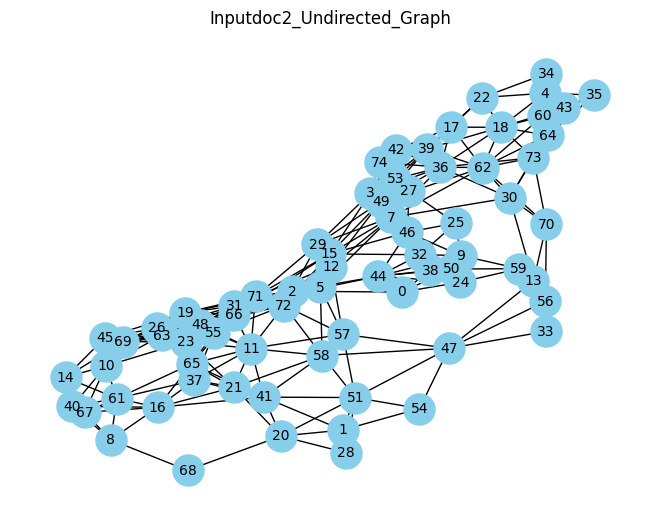

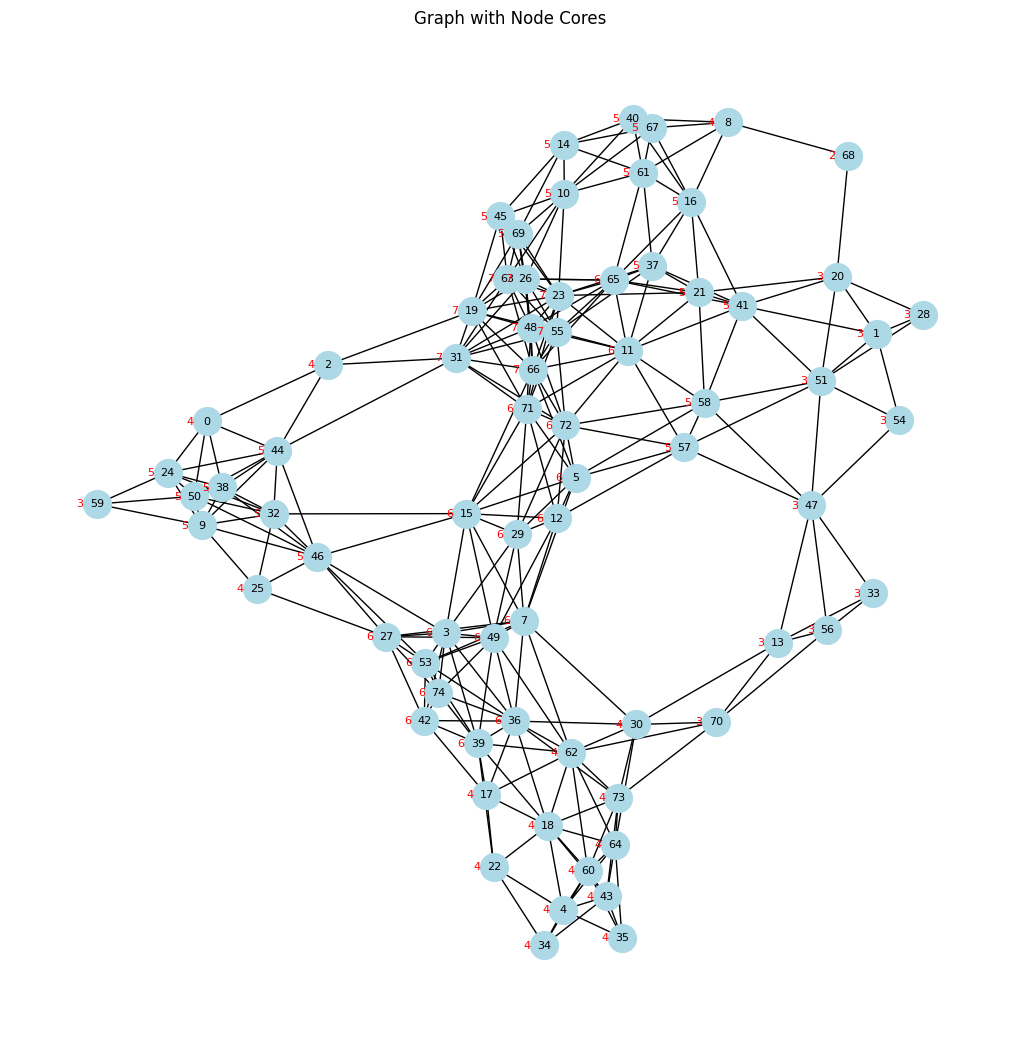

In [8]:
if __name__ == "__main__":
    input_file = "E:\\wy\\用户名ASUS\\Desktop\\作业\\复杂网络\\第二周\\inputdoc2.gml"

    # 问题1: 加载无向图
    input_graph = load_graph_from_gml(input_file)
    pos = nx.spring_layout(input_graph)  # 定义节点的布局
    nx.draw(input_graph, pos, with_labels=True, node_color='skyblue', node_size=500, font_size=10)
    plt.title("Inputdoc2_Undirected_Graph")
    plt.show()

    # 问题2: 计算节点核数
    node_cores = calculate_node_cores(input_graph)

    # 问题3: 绘制带节点核数的无向图
    draw_graph_with_cores(input_graph, node_cores)
    